Text(0.5, 0.98, 'Rotten Tomatoes Rating vs IMDB rating on Budget')

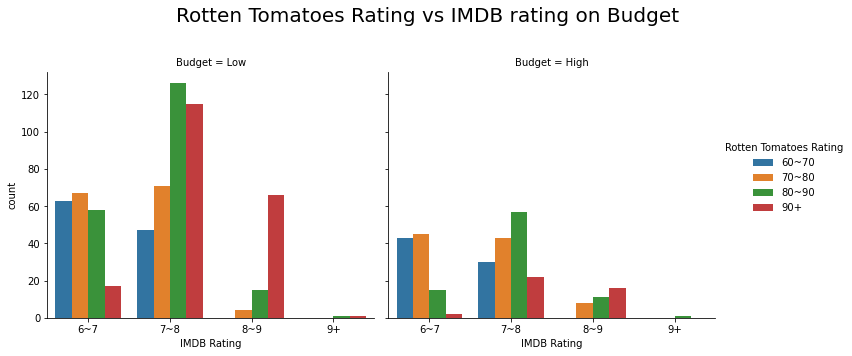

In [13]:
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("./movies.csv")
# filter the low graded movies 
df = df[df['Rotten Tomatoes Rating']> 60]
df = df[df['IMDB Rating']> 6]
#find the budget mean
mean = df['Production Budget'].mean()
#add new attribute and devide movies into 2 groups 
df['Budget'] = df['Production Budget'].apply(lambda value: 'Low' if value <= mean else 'High')
                                                            
df['Budget'] = pd.Categorical(df['Budget'],  categories=['Low', 'High'])

#change the attribute to avoid mistakes 
df['Rotten Tomatoes Rating'] = df['Rotten Tomatoes Rating'].apply(lambda value: '60~70' 
                                                              if value < 70 else '70~80' 
                                                                  if value <= 80 else '80~90'
                                                                      if value <= 90 else '90+')
df['Rotten Tomatoes Rating'] = pd.Categorical(df['Rotten Tomatoes Rating'],  categories=['60~70', '70~80','80~90','90+'])

df['IMDB Rating'] = df['IMDB Rating'].apply(lambda value: '6~7' 
                                                              if value < 7 else '7~8' 
                                                                  if value <= 8 else '8~9'
                                                                      if value <= 9 else '9+')
df['IMDB Rating'] = pd.Categorical(df['IMDB Rating'],  categories=['6~7', '7~8','8~9','9+'])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
#Paint the graph 
fc = sns.catplot(x="IMDB Rating", hue="Rotten Tomatoes Rating", col="Budget", 
                    data=df, kind="count"
                    )
plt.subplots_adjust(top=0.8)
fc.fig.suptitle("Rotten Tomatoes Rating vs IMDB rating on Budget", fontsize=20)